<a href="https://colab.research.google.com/github/derivai7/PCVK_Ganjil_2023/blob/main/Week11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PRAKTIKUM**

In [8]:
import cv2
import os
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

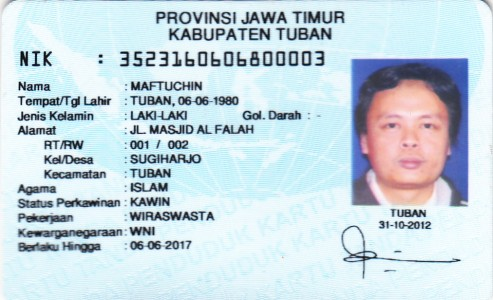

In [3]:
# Load image
ktp_image = cv2.imread('/content/ktp/ktp4.png')
cv2_imshow(ktp_image)

Failed to read image: .ipynb_checkpoints


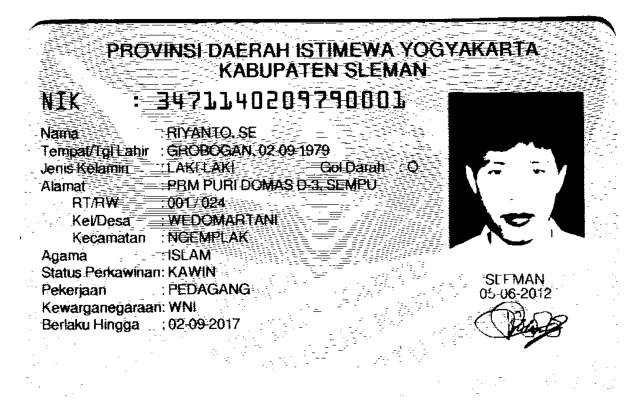

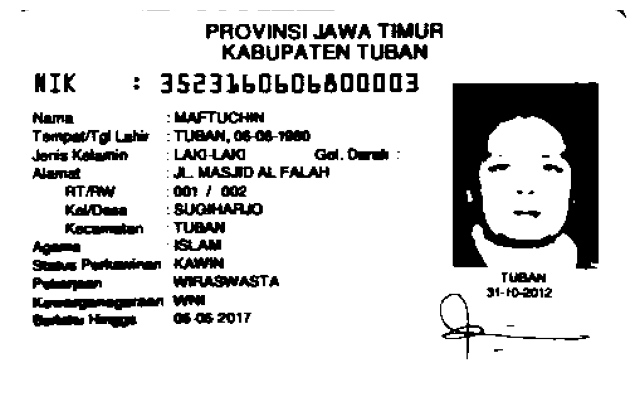

In [21]:
# Lokasi hasil pelat
path_plate = '/content/ktp'

# Looping file di direktori
for name_file in sorted(os.listdir(path_plate)):
    src = cv2.imread(os.path.join(path_plate, name_file))

    # Jika citra dapat dibaca
    if src is not None:
        blurred = src.copy()
        gray = blurred.copy()

        # Filtering
        for i in range(10):
            blurred = cv2.GaussianBlur(src, (5, 5), 0.5)

        # Ubah ke grayscale
        gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)

        # Image morfologi, opening
        ret, binary_image = cv2.threshold(gray.copy(), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

        # Menampilkan gambar ktp-4 dengan matplotlib
        plt.figure(figsize=(8, 8))
        plt.imshow(binary_image, cmap='gray')
        plt.axis('off')
        plt.show()
    else:
        print(f"Failed to read image: {name_file}")

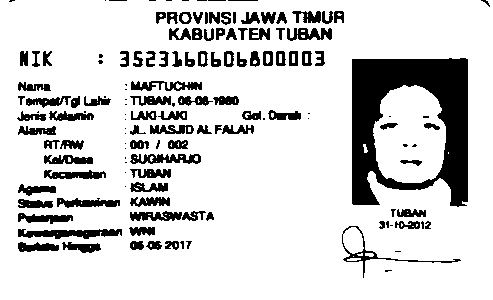

In [22]:
    # Image morfologi, opening
    erode = cv2.erode(binary_image, cv2.getStructuringElement(cv2.MORPH_OPEN, (1, 1)))
    cv2_imshow(erode)

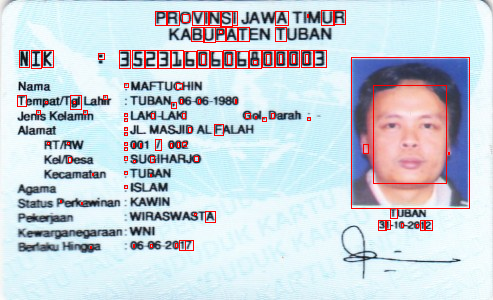

In [23]:
    # Ekstraksi kontur
    contours, hierarchy = cv2.findContours(erode, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

    # Looping contours untuk mendapatkan kontur yang sesuai
    for cnt in contours:
        x, y, w, h = cv2.boundingRect(cnt)
        ras = format(w / h, '.2f')
        if h >= 4 and w >= 1 and float(ras) <= 1:
            # Gambar segiempat hasil segmentasi warna merah
            cv2.rectangle(src, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)
        elif h >= 2 and w >= 1 and float(ras) <= 1:
          cv2.rectangle(src, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)
    cv2_imshow(src)

**TUGAS PRAKTIKUM**

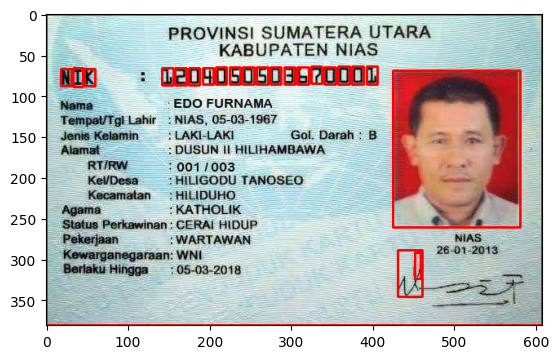

In [24]:
ktp_tugas = cv2.imread('/content/ktp5.png')

blurred = cv2.GaussianBlur(ktp_tugas, (5, 5), 0.5)

gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)
ret, bw = cv2.threshold(gray.copy(), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

erode = cv2.erode(bw.copy(), cv2.getStructuringElement(cv2.MORPH_OPEN, (1, 1)))

# Ekstraksi kontur
contours, hierarchy = cv2.findContours(erode.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

# Looping contours untuk mendapatkan kontur yang sesuai
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    ras = format(w / h, '.2f')
    if h >= 40 and w >= 10 and float(ras) <= 1:
      cv2.rectangle(ktp_tugas, (x, y), (x + w, y + h), (0, 0, 255), thickness=2)
    elif h >= 30 and w >= 5 and float(ras) <= 2:
      cv2.rectangle(ktp_tugas, (x, y), (x + w, y + h), (0, 0, 255), thickness=2)
    elif h >= 20 and w >= 5 and float(ras) <= 3:
      cv2.rectangle(ktp_tugas, (x, y), (x + w, y + h), (0, 0, 255), thickness=2)

# Menampilkan gambar KTP dengan kontur menggunakan plt
ktp_rgb = cv2.cvtColor(ktp_tugas, cv2.COLOR_BGR2RGB)
plt.imshow(ktp_rgb)
plt.show()